# COMP1008 2020/21 Coursework - Credit Risk Prediction
<b>Student Name</b>: Razan <br>
<b>Student ID</b>: ###

## Task description

Credit scoring is an analysis by financial institutions to valuate a person's or business creditworthiness. You will work on a credit risk classification task based on a given dataset of 1000 customers' records collected at a bank. The aim is to help the bank manager to predict the credit risk of new customers and make better decisions on approving their loan applications.

Answer the below questions and displaying the corresponding codes which support your answers.

In [639]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Question 1. Data Analysis and Preparation (6 marks)

In [640]:
df1 = pd.read_excel('data/data-CreditRisk.xls')

In [641]:
df1.shape

(1000, 11)

In [642]:
df1.describe()

,ID,Age,Job,CreditAmount,Duration
count,1000.000000,1000.000000,996.000000,997.000000,995.000000
mean,499.500000,35.546000,1.902610,3276.432297,20.896482
std,288.819436,11.375469,0.653981,2825.236506,12.083060
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1366.000000,12.000000
50%,499.500000,33.000000,2.000000,2323.000000,18.000000
75%,749.250000,42.000000,2.000000,3973.000000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


### 1a. Basic data analysis and plottings
Display your code and the appropriate plottings to support your answers to the following questions:
- Are most of the existing customers 'good' or 'bad' customers? [0.5 marks]<br>

<b>Answers</b>: as shown in the histogram below 70% of the customers are good customers where as 30% customers are bad, Therefore most of the customers are good customers.

In [643]:
print("The Customer Risk Analysis")
df1["Risk"].value_counts()


The Customer Risk Analysis


good    700
bad     300
Name: Risk, dtype: int64

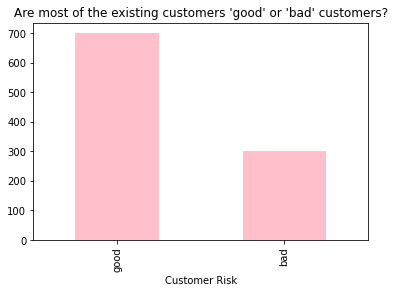

In [644]:

plot = df1["Risk"].value_counts().plot(kind="bar", xlabel="Customer Risk", 
                                title="Are most of the existing customers 'good' or 'bad' customers?", color="pink")
plt.show()

- Are customers with shorter durations more likely to have good or bad credit? [0.5 marks]

<b>Answers</b>: the below distribution and box plot is showing that customers with shorter durations are more likely to have good credit.

duration versus Risk


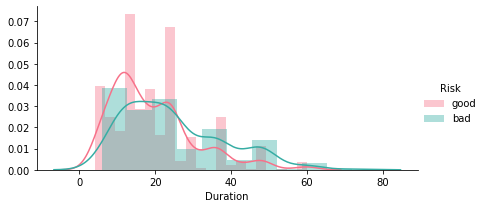

<AxesSubplot:xlabel='Risk', ylabel='Duration'>

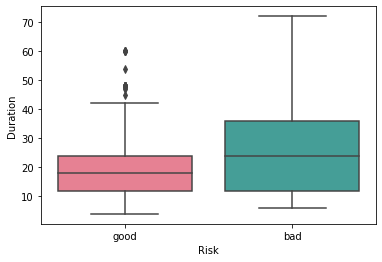

In [647]:
print("duration versus Risk")
sns.FacetGrid(df1, hue="Risk",aspect=2, palette = "husl").map(sns.distplot, "Duration").add_legend()
plt.show()

sns.boxplot(y="Duration", x="Risk", data=df1, palette = "husl")

Do male or female customers have higher CreditAmount on average? Do good customers have higher CreditAmount on average than bad customers? Disply the code and appropriate plottings to support your answers. [1 mark]

<b>Answers</b>: 
1. Male customers have higher CreditAmount on average. 
2. Bad customers have higher CreditAmount on average than good customers.

The mean Credit Amount score for male customer is 3456.32, where as for female customer is 2877.77.


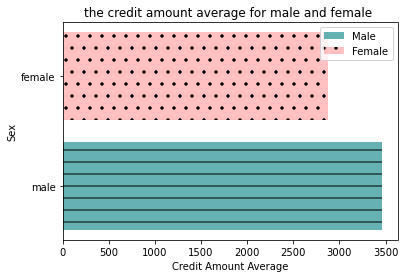

In [648]:
maleCreditAmount = df1[df1["Sex"] == "male"]["CreditAmount"].mean()
femaleCreditAmount = df1[df1["Sex"] == "female"]["CreditAmount"].mean()

print("The mean Credit Amount score for male customer is {:.2f}, where as for female customer is {:.2f}.".format(maleCreditAmount,
                                                                                                                femaleCreditAmount))
plt.barh("male", (maleCreditAmount), label="Male", hatch="-", alpha=0.6, color= '#008080')
plt.barh("female", (femaleCreditAmount), label="Female", hatch=".", alpha=0.6, color= '#ff9999')
plt.title('the credit amount average for male and female ')

plt.ylabel("Sex")
plt.xlabel("Credit Amount Average")

plt.legend()

The mean Credit Amount score for good customer is 2988.70, where as for bad customer is 3948.13.


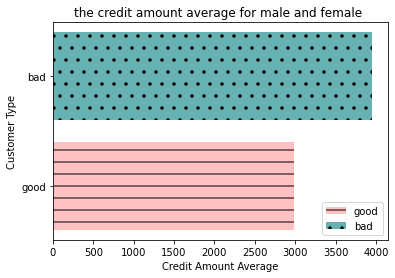

In [649]:
goodCreditAmount = df1[df1["Risk"] == "good"]["CreditAmount"].mean()
badCreditAmount = df1[df1["Risk"] == "bad"]["CreditAmount"].mean()

print("The mean Credit Amount score for good customer is {:.2f}, where as for bad customer is {:.2f}.".format(goodCreditAmount,
                                                                                                                badCreditAmount))
plt.barh("good", (goodCreditAmount), label="good", hatch="-", alpha=0.6, color= '#ff9999')
plt.barh("bad", (badCreditAmount), label="bad", hatch=".", alpha=0.6, color= '#008080')
plt.title('the credit amount average for male and female ')

plt.ylabel("Customer Type")
plt.xlabel("Credit Amount Average")

plt.legend()


Analyse 'Housing' against customers' credit risks. Among customers of different 'Housing' types, which are more likely to have good credits? Provide the codea dn appropriate plotting(s) to support your answers. [0.5 marks]

<b>Answers</b>: Customers having good and bad risk credit have their own house in majority case.
The percentage was calculated to allow for more precise comparisons between good and bad customers. it was discovered that 75% of good customers have their own houses, while 62% of bad customers have their own houses, which is slightly similar.
However, there is a significant difference between renting and living in a free house. In both cases, they are relatively low, but for bad customers it's considerably more. 

In [650]:
good_housing = df1[df1["Risk"] == "good"]["Housing"].value_counts()
bad_housing = df1[df1["Risk"] == "bad"]["Housing"].value_counts()
print("For good customer housing is \n{}".format(good_housing))
print("\nFor bad customer housing is \n{}".format(bad_housing))

For good customer housing is 
own     527
rent    109
free     64
Name: Housing, dtype: int64

For bad customer housing is 
own     186
rent     70
free     44
Name: Housing, dtype: int64


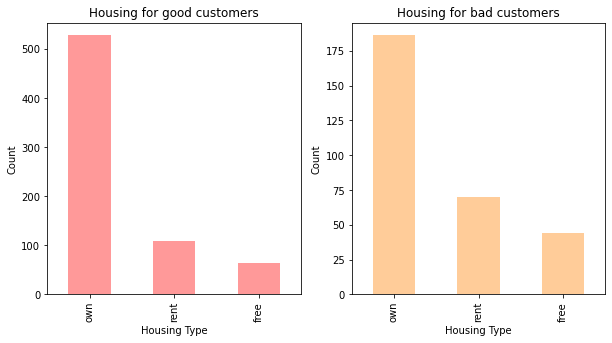

In [651]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
good_housing.plot(kind="bar", xlabel = "Housing Type", ylabel= "Count", ax=ax[0], color = '#ff9999')
ax[0].set_title("Housing for good customers")

bad_housing.plot(kind="bar", xlabel = "Housing Type", ylabel= "Count", ax=ax[1], color='#ffcc99')
ax[1].set_title("Housing for bad customers")
plt.show()

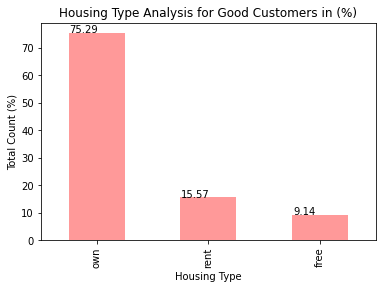

In [652]:
goodHousingType = round(df1[df1.Risk == "good"]["Housing"].value_counts()/len(df1[df1.Risk == "good"]["Housing"]) * 100, 2)
gs = goodHousingType.plot(kind="bar", xlabel="Housing Type", ylabel="Total Count (%)", color = '#ff9999')
plt.title("Housing Type Analysis for Good Customers in (%)")
## for more precise data
for p in gs.patches:
    gs.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

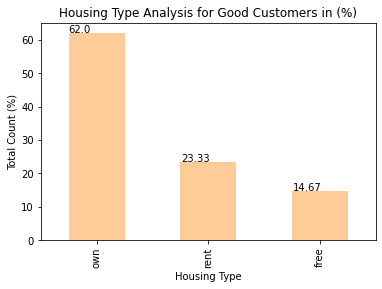

In [653]:
badHousingType = round(df1[df1.Risk == "bad"]["Housing"].value_counts()/len(df1[df1.Risk == "bad"]["Housing"]) * 100, 2)
gs = badHousingType.plot(kind="bar", xlabel="Housing Type", ylabel="Total Count (%)", color='#ffcc99')
plt.title("Housing Type Analysis for Good Customers in (%)")
## for more precise data
for p in gs.patches:
    gs.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### 1b. Data Pre-processing

What issues do you observe in which of the input features in the data? Show the codes which detect these issues. What potential issues this may cause if the data is not pre-processed or processed inappropriately? [1 mark]<br>

<b>Answers</b>: Savings account and Check account has higher missing values according to the dataset, where as CreditAmount, Duration and Job all has between 3 and 5 missing values.

In [654]:
df1.isnull()

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,False,True,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,True,False,False,False,False,False


In [655]:
df1.isnull().sum()

ID                  0
Age                 0
Sex                 0
Job                 4
Housing             0
SavingAccounts    183
CheckAccount      394
CreditAmount        3
Duration            5
Purpose             0
Risk                0
dtype: int64

Credit amount has higher number of outliers. But that can be ignored.

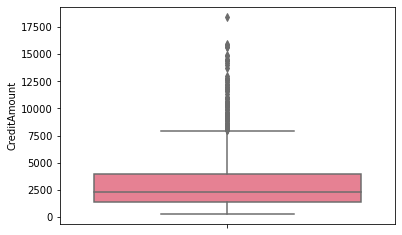

In [572]:
sns.boxplot(y="CreditAmount", data=df1, palette = "husl")
plt.ylabel("CreditAmount")
plt.show()

In [573]:
df1.dtypes

ID                  int64
Age                 int64
Sex                object
Job               float64
Housing            object
SavingAccounts     object
CheckAccount       object
CreditAmount      float64
Duration          float64
Purpose            object
Risk               object
dtype: object

Show the steps of code to address the above observed issues with features. Briefly explain the reason to support your selected functions / methods. [1 mark]

<b>Answers</b>: From the above distribution and box plot we can say that, customers with shorter durations more likely to have good credit where as the more the duration the more it is a bad credit.

1. There are different data types present in the dataset. Such as int, float and object type.
2. For encoding of data we must make these categorical features to vectors and labels.

<i>Potential Issue</i>

1. As the missing values are present, encoding methods can't decode NaN values during encoding.
2. outliers can affect the models in future model building.

Prepare the data ready for building the machine learning models in Questions 2 and 3. Show and explain the functions / methods. Why this preparation is needed? [1.5 marks]<br>
Note: include here all your data pre-processing steps needed for building all models in Questions 2 and 3.

<b>Answers</b>: 

### Null Values Imputation
#### Jobs

In [656]:
print("Value counts for Job :\n{}.".format(df1.Job.value_counts()))
print("\nTotal null values present in Job column is {}.".format(df1.Job.isnull().sum()))

#as job type 2 has highest values and the count of null values for job is 4. we can impute with job 2.0
df1["Job"].fillna(2.0)

Value counts for Job :
2.0    627
1.0    200
3.0    147
0.0     22
Name: Job, dtype: int64.

Total null values present in Job column is 4.


0      2.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
995    1.0
996    3.0
997    2.0
998    2.0
999    2.0
Name: Job, Length: 1000, dtype: float64

#### Jobs

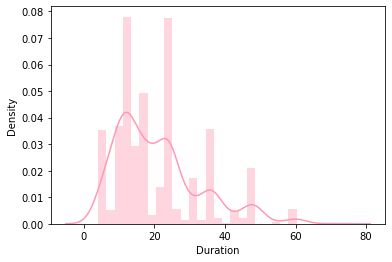

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
6,6,53,male,2.0,own,quite rich,NaN,2835.0,NaN,furniture/equipment,good
64,64,26,female,2.0,own,little,NaN,3181.0,NaN,radio/TV,good
121,121,41,female,3.0,rent,little,NaN,3868.0,NaN,car,good
863,863,32,male,1.0,own,rich,NaN,4526.0,NaN,furniture/equipment,good
995,995,31,female,1.0,own,little,NaN,1736.0,NaN,furniture/equipment,good


In [657]:
sns.distplot(df1["Duration"], kde=True, color="#ff99b3")
plt.show()

df1[df1['Duration'].isna()]

* All Duration having null values belong to good customers. So imputation will be average duration of good customers. 


In [658]:
good_duration_median = df1[df1.Risk == "good"]["Duration"].median()
df1["Duration"] = df1["Duration"].fillna(good_duration_median)

#### Credit Amount

In [659]:
df1[df1['CreditAmount'].isna()]

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
46,46,39,male,2.0,own,quite rich,NaN,NaN,36.0,radio/TV,good
91,91,54,male,2.0,own,little,little,NaN,12.0,car,good
648,648,38,male,2.0,free,little,rich,NaN,24.0,car,bad


* As the CreditAmount Null values are very less, we will impute the median values for Risk wise as this is going to be the output label.
* The reason of taking median values as imputation values is median is not prone to oulier and our dataset has outliers in good class.

In [660]:
good_cred_median = df1[df1.Risk == "good"]["CreditAmount"].median()
bad_cred_median = df1[df1.Risk == "bad"]["CreditAmount"].median()

#imputing median values for good and bad Risk customers
df1["Cred_good"] = df1[df1.Risk == "good"]["CreditAmount"].fillna(good_cred_median)
df1["Cred_good"] = df1["Cred_good"].fillna(0)
df1["Cred_bad"] = df1[df1.Risk == "bad"]["CreditAmount"].fillna(bad_cred_median)
df1["Cred_bad"] = df1["Cred_bad"].fillna(0)

#imputation of null values for both good and bad Risk customers
df1["CreditAmount"] = df1["Cred_bad"] + df1["Cred_good"]

In [661]:
df1 = df1.drop(columns = ["Cred_good", "Cred_bad"])

#### Savings Account

In [662]:
print("Saving Accounts distribution for Good Customers.")
print(df1[df1.Risk == "good"]["SavingAccounts"].value_counts())
print("Total Null values present in the Savings Account having Risk as good is {}".format(df1[df1["Risk"] == 
                                                                                              "good"]["SavingAccounts"].isnull().sum()))

print("\nSaving Accounts distribution for Bad Customers.")
print(df1[df1.Risk == "bad"]["SavingAccounts"].value_counts())
print("Total Null values present in the Savings Account having Risk as good is {}".format(df1[df1["Risk"] == 
                                                                                              "bad"]["SavingAccounts"].isnull().sum()))


Saving Accounts distribution for Good Customers.
little        386
moderate       69
quite rich     52
rich           42
Name: SavingAccounts, dtype: int64
Total Null values present in the Savings Account having Risk as good is 151

Saving Accounts distribution for Bad Customers.
little        217
moderate       34
quite rich     11
rich            6
Name: SavingAccounts, dtype: int64
Total Null values present in the Savings Account having Risk as good is 32


For Saving Account for Good Customer has very high null values. Here we have to analyse an another column for imputation as this is a crucial feature for future analysis.

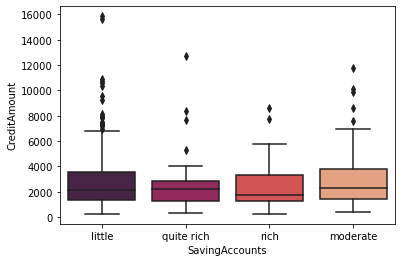

In [663]:
### distribution plot for Credit Amount and the Saving Amounts
x = df1[df1["Risk"] == "good"]
sns.boxplot(y="CreditAmount", x= "SavingAccounts", data=x, palette = "rocket")
plt.show()

As shown above all the SavingsAccounts have almost similar distribution of credit Amount.

In [664]:
#null value imputation
df1["SavingAccounts"] = df1["SavingAccounts"].fillna("little")

#### CheckAccount

In [665]:
print("The amount of null values present in the Check Amount column is {}.".format(df1["CheckAccount"].isnull().sum()))

The amount of null values present in the Check Amount column is 394.


As the null values present in the check amount is high, we must drop this column for futher analysis. Also the ID is also redundent and not adding much value over here.

In [666]:
df2 = df1.drop(columns = ["CheckAccount", "ID"])
print("Final Dataframe shape is {}.".format(df2.shape))

Final Dataframe shape is (1000, 9).


In [667]:
df2.sample()

,Age,Sex,Job,Housing,SavingAccounts,CreditAmount,Duration,Purpose,Risk
333,24,female,1.0,rent,moderate,11590.0,48.0,car,bad


### Data Encoding

Machine Learning models can't handle raw values. To overcome this we must encode the columns and we have to keep those values within a range as well.

In [668]:
#getting categorical columns
cat_cols = ["Sex", "Job", "Housing", "SavingAccounts", "Purpose", "Risk"]

for col in cat_cols:
    enc = LabelEncoder()
    df2[col] = enc.fit_transform(df2[col].values)

#getting numerical columns
num_cols = ["CreditAmount", "Duration", "Age"]
for col in num_cols:
    enc_num = MinMaxScaler()
    df2[col] = enc_num.fit_transform(df2[col].values.reshape(-1,1))

In [669]:
df2

,Age,Sex,Job,Housing,SavingAccounts,CreditAmount,Duration,Purpose,Risk
0,0.857143,1,2,1,0,0.050567,0.029412,5,1
1,0.053571,0,2,1,0,0.313690,0.647059,5,0
2,0.535714,1,1,1,0,0.101574,0.117647,3,1
3,0.464286,1,2,0,0,0.419941,0.558824,4,1
4,0.607143,1,2,0,0,0.254209,0.294118,1,0
...,...,...,...,...,...,...,...,...,...
995,0.214286,0,1,1,0,0.081765,0.205882,4,1
996,0.375000,1,3,1,0,0.198470,0.382353,1,1
997,0.107143,0,2,2,0,0.057500,0.117647,1,0
998,0.107143,1,2,1,0,0.430395,0.382353,0,1


### Train Test Split


In [670]:
#create classes
y = df2["Risk"]
X = df2.drop(columns = ["Risk"])

#train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

## Question 2. Artificial Neural Networks (ANN) (7 marks)

### 2a. Build and evaluate your first ANN (i.e. ann1)
Show the steps to build and train <i>ann1</i> with one-hidden layer of 5 neurons. Explain breifly what the input features and/or target output are, and their type and value range, in the training and testing data. [1 mark] <br>
Note: if additional data processing is needed, add them to your answers to the last question of Question 1.

<b>Answers</b>: 

In [671]:
clf_nn = MLPClassifier(hidden_layer_sizes=5, 
                       activation='relu', 
                       max_iter=50,  
                      random_state = 42,
                      solver = "lbfgs")  

#fitting the model with training dataset
clf_nn.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=5, max_iter=50, random_state=42,
              solver='lbfgs')

In [672]:
Xtrain.sample(2)

,Age,Sex,Job,Housing,SavingAccounts,CreditAmount,Duration,Purpose
423,0.267857,1,3,1,1,0.073787,0.250000,4
420,0.017857,0,2,2,3,0.161549,0.161765,1



* For Training and Test input datasets I have done the label encoding for all categorical values, which starts from 0 to the number of categories present. 
* For credit amount column which is a numerical data, I have done minmax scaler which has the range between 0 to 1. This is because to keep the values between 0 to 1 as the column has high outliers as well.

In [673]:
ytrain.sample(2)

592    1
295    0
Name: Risk, dtype: int32

* For both train and test dataset output label has categorized as 1 - good and 0 - bad.

What's the accuracy of <i>ann1</i>? What does this mean in terms of classifying new customers? [0.5 marks]<br>
Show the steps to calculate the accuracy of <i>ann1</i> on the training data and testing data, respectively. Is <i>ann1</i> a good model on classifying new customers? Explain the reasons to support your answers. [1 mark]

<b>Answers</b>: under the code

In [675]:
#to calculate the accuracy
ypred = clf_nn.predict(Xtest)

#to get the accuracy 
acc_score = accuracy_score(ytest, ypred)
print("The accuracy score is {:.2f}.".format(acc_score))
print("The overall f1 score is {:.2f}.".format(f1_score(ytest, ypred)))
print("Classification Score is \n{}.".format(classification_report(ytest, ypred)))

The accuracy score is 0.69.
The overall f1 score is 0.81.
Classification Score is 
              precision    recall  f1-score   support

           0       0.38      0.08      0.14        60
           1       0.71      0.94      0.81       140

    accuracy                           0.69       200
   macro avg       0.55      0.51      0.47       200
weighted avg       0.61      0.69      0.61       200
.



* From above classification report we can say that ann model is failed to generalize the class 0 means bad customer which is our main point of concern. 
* Though the overall performace is good, due to failure of generalizing of bad customers we can't use this model for our customer risk prediction.

Display and explain the confusion matrix of <i>ann1</i>. Is <i>ann1</i> good at predicting 'good' or 'bad' customers? Show the steps which calculate the comparisons. [1 mark]

<b>Answers</b>: 

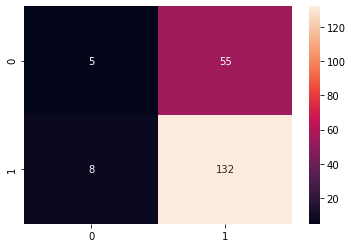

In [676]:
conf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(conf_matrix, annot=True, cmap ="rocket", fmt="d")
plt.show()


* ann1 is not a good model to use for predicting "good" and "bad" customers, due to failure in generalization error of data for bad customers.

### 2b. Build and evaluate another ANN (i.e. ann2)
Show the steps to build <i>ann2</i> with a different setting (e.g. different no. of hidden layers and / or neurons, etc.). Explain briefly the different setting of <i>ann2</i>. [0.5 marks]

<b>Answers</b>: 
* For the ann2, I have taken 4 hidden layers with (10, 20,10).
* I have taken the combination as this reflects as an encoder model features from the datapoints.

In [677]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(hidden_layer_sizes=(20,30,20),
                        activation='relu',
                      max_iter=50,
                      random_state=42,
                      solver="lbfgs")

clf_nn.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(20, 30, 20), max_iter=50, random_state=42,
              solver='lbfgs')

Show the steps to calculate the accuracy of <i>ann2</i> on the training data and testing data, respectively. Is <i>ann2</i> a good model? Explain the reasons. [0.5 marks]<br>

<b>Answers</b>: ann2 also performing bad for the class 0 ( bad customers ) which is our main concern to get precision and recall high.

In [678]:
ypred = clf_nn.predict(Xtest)

acc_score = accuracy_score(ytest, ypred)
print("The accuracy score is {:.2f}.".format(acc_score))
print("The overall f1 score is {:.2f}.".format(f1_score(ytest, ypred)))
print("Classification Score is \n{}.".format(classification_report(ytest, ypred)))

The accuracy score is 0.69.
The overall f1 score is 0.80.
Classification Score is 
              precision    recall  f1-score   support

           0       0.48      0.23      0.31        60
           1       0.73      0.89      0.80       140

    accuracy                           0.69       200
   macro avg       0.61      0.56      0.56       200
weighted avg       0.66      0.69      0.66       200
.


Print and explain the confusion matrix of <i>ann2</i>. Which of <i>ann1</i> and <i>ann2</i> is better, and why? [1 mark]

<b>Answers</b>: Between ann1 and ann2, ann2 has better recall and precision score class wise.
 Also it is able to predict the FP class very well.
ann2 is better than ann1.

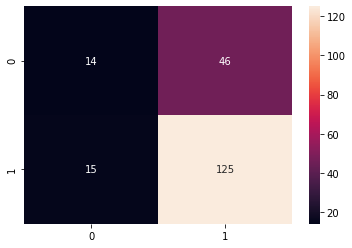

In [679]:
conf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(conf_matrix, annot=True, cmap ="rocket", fmt="d")
plt.show()

Use cross-validation, and together with the analysis on their confusion matrix, explain which of <i>ann1</i> and <i>ann2</i> is better. Show the steps to support your analysis. [1.5 marks]

<b>Answers</b>: 
* Both the models failed to generalize the class 0. therefore both of them perform bad.

### ANN1

In [680]:
ann1 = MLPClassifier(max_iter=25, random_state=42, hidden_layer_sizes=(5))

In [681]:
param_grid = {'solver': ['sgd', 'adam'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant','adaptive']}
grid_clf = GridSearchCV(ann1, param_grid, n_jobs=-1, cv=7).fit(Xtrain, ytrain)

print("Best cross-validation score: {:.2f}".format(grid_clf.best_score_))
print("Best parameters: ", grid_clf.best_params_)

Best cross-validation score: 0.70
Best parameters:  {'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}


In [682]:
ann1_clf = MLPClassifier(max_iter=100, random_state=42, hidden_layer_sizes=(5),
                            alpha = grid_clf.best_params_['alpha'],
                            learning_rate = grid_clf.best_params_['learning_rate'],
                            solver = grid_clf.best_params_['solver'])

In [683]:
ann1_clf.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=5, max_iter=100, random_state=42)

In [684]:
ypred = ann1_clf.predict(Xtest)

In [685]:
acc_score = accuracy_score(ytest, ypred)
print("The accuracy score is {:.2f}.".format(acc_score))
print("The overall f1 score is {:.2f}.".format(f1_score(ytest, ypred)))
print("Classification Score is \n{}.".format(classification_report(ytest, ypred)))

The accuracy score is 0.70.
The overall f1 score is 0.82.
Classification Score is 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.70      1.00      0.82       140

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200
.


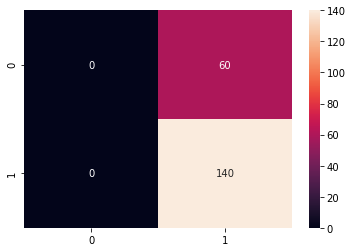

In [686]:
conf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(conf_matrix, annot=True, cmap ="rocket", fmt="d")
plt.show()

### ANN 2

In [687]:
ann2 = MLPClassifier(max_iter=25, random_state=42, hidden_layer_sizes=(20,30,20))


In [688]:
param_grid = {'solver': ['sgd', 'adam'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant','adaptive']}

grid_clf = GridSearchCV(ann2, param_grid, n_jobs=-1, cv=7).fit(Xtrain, ytrain)

print("Best cross-validation score: {:.2f}".format(grid_clf.best_score_))
print("Best parameters: ", grid_clf.best_params_)

Best cross-validation score: 0.70
Best parameters:  {'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'sgd'}


In [689]:
ann2_clf = MLPClassifier(max_iter=100, random_state=42, hidden_layer_sizes=(5),
                            alpha = grid_clf.best_params_['alpha'],
                            learning_rate = grid_clf.best_params_['learning_rate'],
                            solver = grid_clf.best_params_['solver'])


In [690]:
ann2_clf.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=5, max_iter=100, random_state=42, solver='sgd')

In [691]:
ypred = ann2_clf.predict(Xtest)

In [692]:
acc_score = accuracy_score(ytest, ypred)
print("The accuracy score is {:.2f}.".format(acc_score))
print("The overall f1 score is {:.2f}.".format(f1_score(ytest, ypred)))
print("Classification Score is \n{}.".format(classification_report(ytest, ypred)))


The accuracy score is 0.70.
The overall f1 score is 0.82.
Classification Score is 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.70      1.00      0.82       140

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200
.


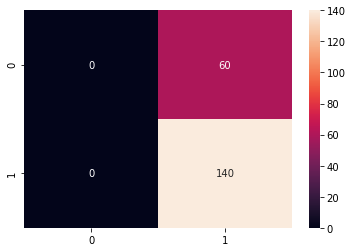

In [693]:
conf_matrix1 = confusion_matrix(ytest, ypred)
sns.heatmap(conf_matrix1, annot=True, cmap ="rocket", fmt="d")
plt.show()

## Question 3. Decision Tree (12 marks)

### 3a. Build and evaluate your first decision tree (i.e. dt1)

Show the steps to build and train <i>dt1</i> with a depth of 3, using the same settings of data as those for <i>ann1</i> in Question 2a.<br>
Calculate the accuracy of <i>dt1</i> on the training data and testing data, respectively. Explain if <i>dt1</i> is a good model on classifying new customers. [1 mark]

<b>Answers</b>: 
* The representation of df1 below shows that is good accuracy but higher precision score which is acceptable. 

In [694]:
dt1 = DecisionTreeClassifier(random_state=42, max_depth = 3)

dt1.fit(Xtrain, ytrain)


ypred = dt1.predict(Xtest)


acc_score = accuracy_score(ytest, ypred)
print("The accuracy score is {:.2f}.".format(acc_score))
print("The overall f1 score is {:.2f}.".format(f1_score(ytest, ypred)))
print("Classification Score is \n{}.".format(classification_report(ytest, ypred)))

The accuracy score is 0.71.
The overall f1 score is 0.82.
Classification Score is 
              precision    recall  f1-score   support

           0       0.56      0.15      0.24        60
           1       0.72      0.95      0.82       140

    accuracy                           0.71       200
   macro avg       0.64      0.55      0.53       200
weighted avg       0.67      0.71      0.65       200
.


Print and explain the confusion matrix of <i>dt1</i>. Is <i>dt1</i> good at predicting 'good' or 'bad' customers? [0.5 marks]

<b>Answers</b>: dt1 is good at predicting good customers.

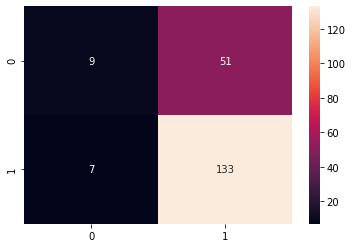

In [695]:
conf_matrix2 = confusion_matrix(ytest, ypred)
sns.heatmap(conf_matrix2, annot=True, cmap ="rocket", fmt="d")
plt.show()

### 3b. Build another decision tree (i.e. dt2)
Remove one input feature from the data and show your steps to build <i>dt2</i> with the reduced data. Observe and explain which input feature affects the accuracy of <i>dt2</i> the most (using k-fold cross-validation). [2 marks]

<b>Answers</b>: we removed one feature which is CreditAmount, therefore our model accuracy dropped. Also the precision and recall for our calss 0 has also dropped.

In [696]:
# Removing one input feature from the data
Xtrain1 = Xtrain.drop(columns = ["CreditAmount"])
Xtest1 = Xtest.drop(columns = ["CreditAmount"])

dt2 = DecisionTreeClassifier(random_state=42)

In [697]:
# setting parameter grid
param_grid = {'max_depth': [3,5,10,20,50]}

grid_clf = GridSearchCV(dt2, param_grid, n_jobs=-1, cv=7).fit(Xtrain1, ytrain)

print("Best cross-validation score: {:.2f}".format(grid_clf.best_score_))
print("Best parameters: ", grid_clf.best_params_)


Best cross-validation score: 0.70
Best parameters:  {'max_depth': 3}


In [698]:
#taking the optimal values for analysis
dt2 = DecisionTreeClassifier(random_state=42, max_depth=grid_clf.best_params_['max_depth'])
#fitting the model
dt2.fit(Xtrain1, ytrain)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [699]:
# calculating the accuracy
ypred = dt2.predict(Xtest1)

In [700]:
acc_score = accuracy_score(ytest, ypred)
print("The accuracy score is {:.2f}.".format(acc_score))
print("The overall f1 score is {:.2f}.".format(f1_score(ytest, ypred)))
print("Classification Score is \n{}.".format(classification_report(ytest, ypred)))

The accuracy score is 0.70.
The overall f1 score is 0.81.
Classification Score is 
              precision    recall  f1-score   support

           0       0.50      0.13      0.21        60
           1       0.72      0.94      0.81       140

    accuracy                           0.70       200
   macro avg       0.61      0.54      0.51       200
weighted avg       0.65      0.70      0.63       200
.


Show the confusion matrix of <i>dt2</i> and compare it with that of <i>dt1</i>. How accurate is <i>dt1</i> and <i>dt2</i> (% accuracy) predicting 'bad' customers, respectively? [2 marks]

<b>Answers</b>: dt2 is predicting bad customers very well as compared to dt1 which is not even able to generalise the datapoints.

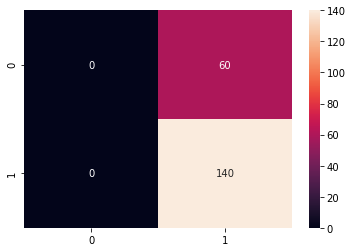

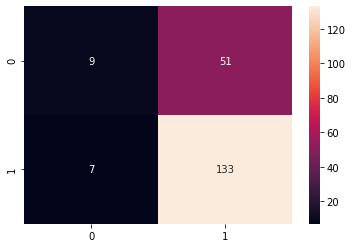

In [701]:
sns.heatmap(conf_matrix1, annot=True, cmap ="rocket", fmt="d")
plt.show()

sns.heatmap(conf_matrix2, annot=True, cmap ="rocket", fmt="d")
plt.show()

In practice, would bank managers prefer <i>dt1</i> or <i>dt2</i>, i.e. which one is better at predicting 'good' or 'bad' customers? [1 mark]

<b>Answers</b>: From the data I think bank managers would prefer dt1, because first dt1 includes Credit Amount which is an important feature to look at, second dt1 has better f1 score in both classes.

### 3c. Tuning your decision decision trees

Experiment with different depths (2~8) of either <i>dt1</i> or <i>dt2</i>. Plot using appropriate method the tree depth against its corresponding accruacy evaluated by cross-validation. [2 marks]

<b>Answers</b>: 

In [702]:
# dt1
scores = list()
for depth in range(3,9):
    dt1 = DecisionTreeClassifier(random_state=42, max_depth = depth).fit(Xtrain, ytrain)
    ypred = dt1.score(Xtest, ytest)
    scores.append(ypred)

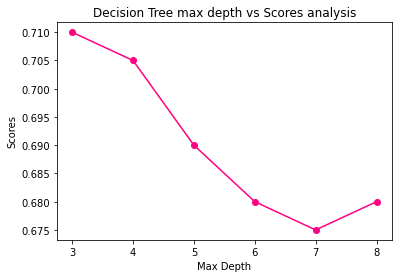

In [703]:
# visulalisation
plt.plot(range(3,9), scores, "o-r", color = '#ff0080')
plt.xlabel("Max Depth")
plt.ylabel("Scores")
plt.title("Decision Tree max depth vs Scores analysis" )
plt.show()

In [704]:
# dt2
scores = list()
for depth in range(3,9):
    dt2 = DecisionTreeClassifier(random_state=42, max_depth = depth).fit(Xtrain1, ytrain)
    ypred = dt2.score(Xtest1, ytest)
    scores.append(ypred)


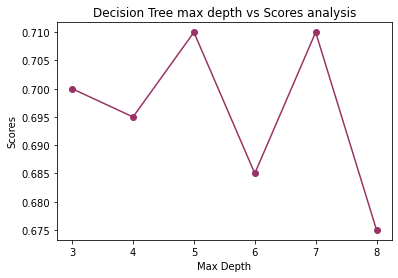

In [705]:
# visulalisation
plt.plot(range(3,9), scores, "o-r", color = '#993366')
plt.xlabel("Max Depth")
plt.ylabel("Scores")
plt.title("Decision Tree max depth vs Scores analysis")
plt.show()

In real-life, which tree depth would you select for better and easier decision making? Breifly explain the reasons. [0.5 marks]

<b>Answers</b>: I would choose dt1 because I think dt1 although it's decreasing but it is more stable and it trained all possible features.

### 3d. Decision making with the decision tree

Visualise your best decision tree model. Extract and explain one example rule from the tree (with regard to its branches and nodes). [1.5 marks]

<b>Answers</b>: 

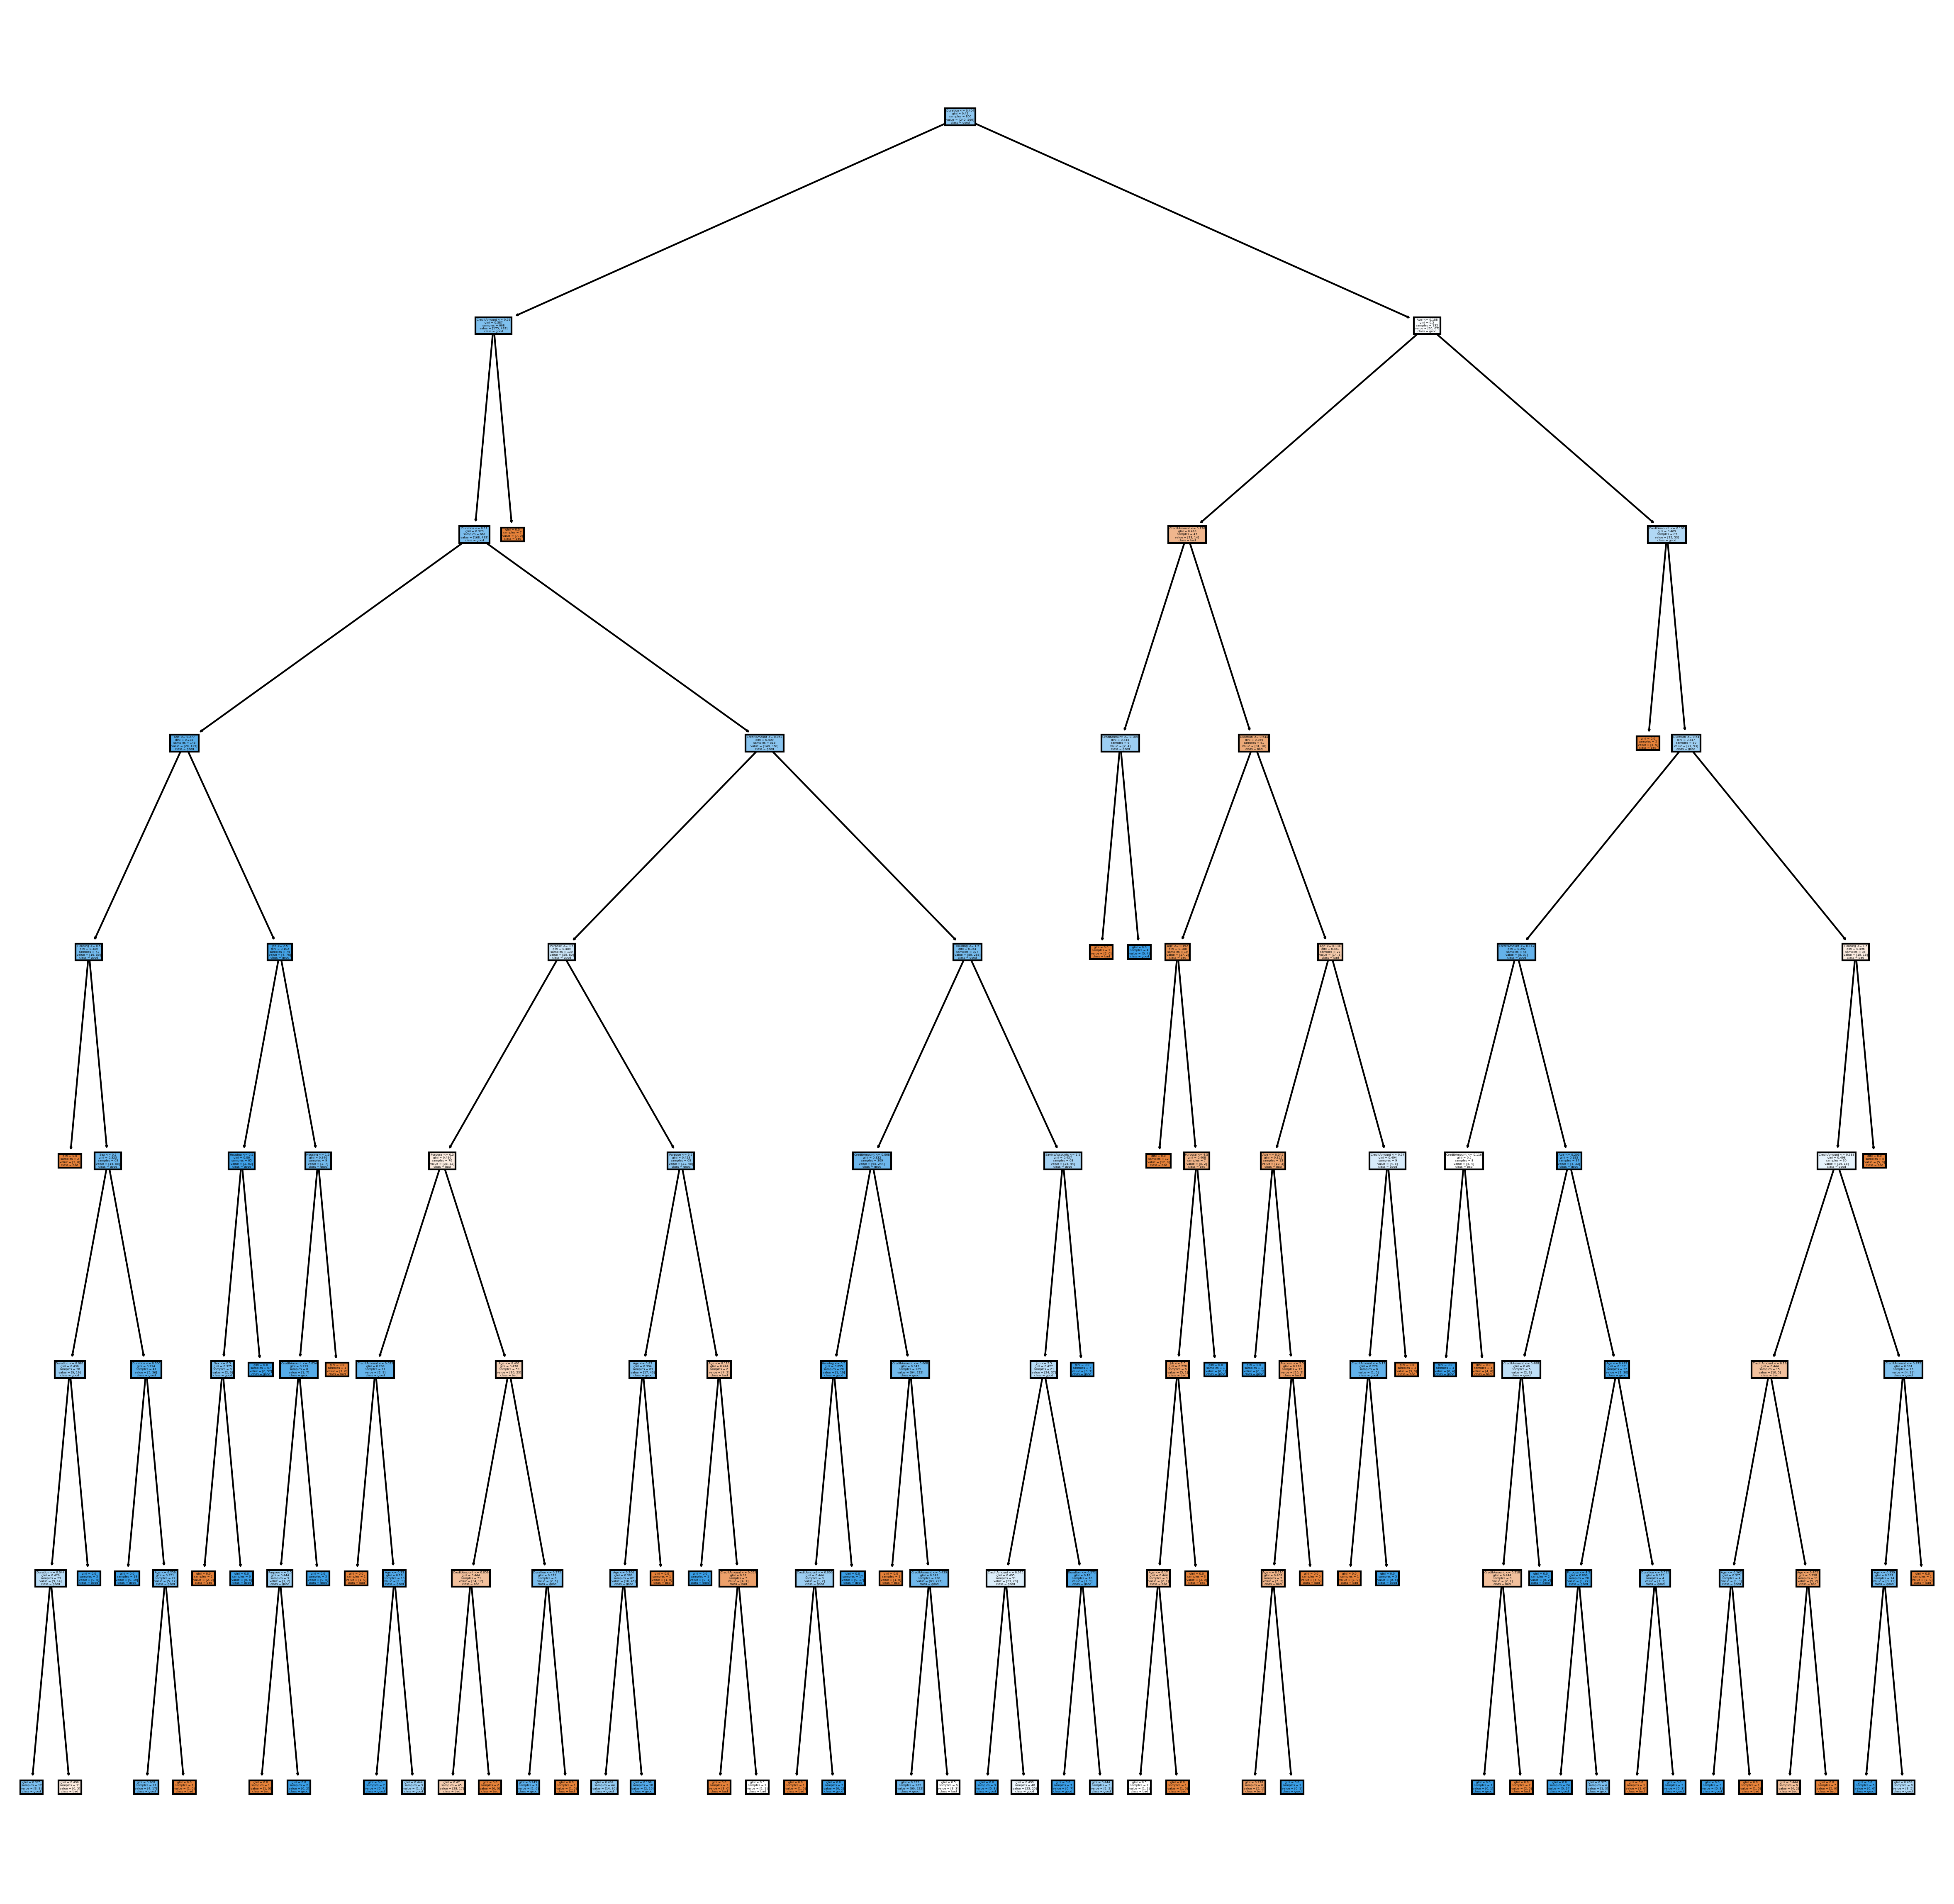

In [706]:

fn = list(Xtrain.columns)
target_names = ['bad', 'good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)

_ = tree.plot_tree(dt1, feature_names = fn, class_names= target_names, filled = True )

plt.show()
#plt.savefig('dt1.png')

A new <i>customer A</i> of age 40 with <font color = "red">CreditAmount</font> of 2000 applied to a loan. According to your best decision tree, should the bank manager grant the loan? Explain your reasoning with regard to the tree nodes and branches. [0.5 marks]<br>
Note: a typo corrected on 26/03/2021: <i>CheckAmount</i> is changed to <i>CreditAmount</i> in Question 3d.

<b>Answers</b>: Yes the bank manager should provide the loan, because The gini is high and entropy is low for age having 40 and credit amount less than 3000 which is encoded above.

Based on your above analysis, is decision tree better than neural networks models? Which machine learning model would you recommend the bank manager to use? Why? [1 mark]

<b>Answers</b>: 
In my opinion and depending on the results and analysis above, I would recommend the decision tree for the bank manager to use, because:

First, the neural network fails to generalise the imbalanced class and provides output from the higher class. On the other hand, the decision tree is able to generalise both classes well.

Second, the Decision Tree is stronger and more statistically explainable. but neural network models are not as good and precise as the Decision Tree.

## Appendix. Coursework Instructions

## Introduction

<b>Main tasks</b>: to build and analyse decision trees and neural networks for a classification task. Support of coursework include:
- Lab demos of data processing and machine learning models using different functions and methods in Python for different example problems;
- Example code building and analysing machine learning models, referring to content in COMP1008 on “Machine learning”.
- Q&A support for exercises in the labs to build different models using different methods / functions on example problems.
- In Teams channel 'COMP1008 Coursework': support of common questions in completing the coursework.

<b>Marks</b>: in total 25 marks, allocated on the basis of:
- knowledge and understanding showed when answering the questions in the Jupyter file report,
- how informative and well presented your code, visualisations and results are,
- self-learning ability making use of online resources,
- problem solving skills to achieve the answers and results,
- concise language and ease of reading, i.e. just enough details for others to repeat your methods and obtain the same results.


